# Importing the Required Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

# Reading the Dataset

In [14]:
df = pd.read_csv('Bitcoin.csv')
print(df.shape)

(1048575, 8)


# Filling the NaN values using fillna method

In [15]:
df['Open'] = df['Open'].fillna(df['Open'].median())
df['High'] = df['High'].fillna(df['High'].median())
df['Low'] = df['Low'].fillna(df['Low'].median())
df['Close'] = df['Close'].fillna(df['Close'].median())
df['Volume_(BTC)'] = df['Volume_(BTC)'].fillna(df['Volume_(BTC)'].median())
df['Volume_(Currency)'] = df['Volume_(Currency)'].fillna(df['Volume_(Currency)'].median())
df['Weighted_Price'] = df['Weighted_Price'].fillna(df['Weighted_Price'].median())


# Storing the dependent and independent variable in x and y

In [16]:
x = df.iloc[:,1:-1]
y = df.iloc[:,-1]

# Preprocessing the Data using MinMaxScaler

In [17]:
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()
df = ss.fit_transform(df)

# Splitting the Dataset as x_train,x_test,y_train,y_test

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=44)


# Applying Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x,y)
y_pred = rf.predict(x_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
R2 = metrics.r2_score(y_test, y_pred)

# Printing the metrics

In [21]:
print("RMSE:",rmse)
print("R2_score:",R2)
print('Score : ',rf.score(x,y))

RMSE: 0.1389291294845536
R2_score: 0.9999992735308353
Score :  0.9999993325097082



# Plotting each column in x vs y

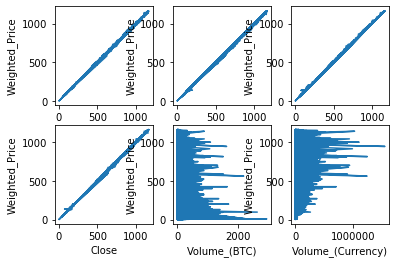

In [24]:
a = ['Open','High','Low','Close','Volume_(BTC)','Volume_(Currency)']
for i in range(0,6):
    plt.subplot(2,3,i+1)
    plt.plot(x[a[i]],y)
    plt.xlabel(a[i])
    plt.ylabel('Weighted_Price')
plt.show()

# Y_predicted VS Y_Tested

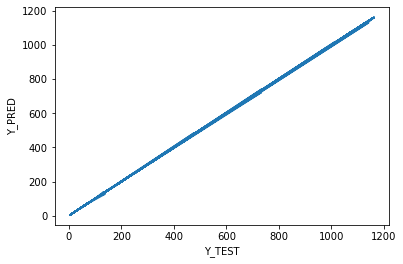

In [23]:
plt.plot(y_test,y_pred)
plt.xlabel('Y_TEST')
plt.ylabel('Y_PRED')
plt.show()